<a href="https://colab.research.google.com/github/phanikiran99/kaggle/blob/master/EDA_Covid19India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import requests

#plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [0]:
api = 'https://api.covid19india.org/data.json'
resp = requests.get(api)

In [0]:
caseTimeSeries = pd.DataFrame(resp.json()['cases_time_series'])
stateWise = pd.DataFrame(resp.json()['statewise'])
tested = pd.DataFrame(resp.json()['tested'])

In [0]:
testPlots = tested[['totalindividualstested','totalpositivecases','totalsamplestested','updatetimestamp']]
testPlots = testPlots.apply(lambda x: x.str.strip()).replace('', np.nan)
testPlots = testPlots.fillna(method='ffill')

In [5]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=testPlots['updatetimestamp'], y=testPlots['totalindividualstested'],name='Total Tested'))
fig.add_trace(go.Scatter(x=testPlots['updatetimestamp'],y=testPlots['totalpositivecases'],name='Total Positve cases'))
fig.update_layout(title_text="India Tested vs Positive Cases")
fig.show()

In [6]:
caseTimeSeries

,dailyconfirmed,dailydeceased,dailyrecovered,date,totalconfirmed,totaldeceased,totalrecovered
0,1,0,0,30 January,1,0,0
1,0,0,0,31 January,1,0,0
2,0,0,0,01 February,1,0,0
3,1,0,0,02 February,2,0,0
4,1,0,0,03 February,3,0,0
...,...,...,...,...,...,...,...
78,922,38,273,17 April,14353,486,2040
79,1371,35,426,18 April,15724,521,2466
80,1580,38,388,19 April,17304,559,2854
81,1239,33,419,20 April,18543,592,3273


In [7]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=caseTimeSeries['date'], y=caseTimeSeries['totalconfirmed'], name='Total Confirmed'))
fig.add_trace(go.Scatter(x=caseTimeSeries['date'], y=caseTimeSeries['totalrecovered'], name='Total Recovered'))
fig.add_trace(go.Scatter(x=caseTimeSeries['date'], y=caseTimeSeries['totaldeceased'], name='Total Deceased'))
fig.add_trace(go.Bar(x=caseTimeSeries['date'], y=caseTimeSeries['dailyconfirmed'], name='Daily Confirmed'))
fig.add_trace(go.Bar(x=caseTimeSeries['date'], y=caseTimeSeries['dailydeceased'], name='Daily Deceased'))
fig.add_trace(go.Bar(x=caseTimeSeries['date'], y=caseTimeSeries['dailyrecovered'], name='Daily Recovered'))

fig.update_layout(barmode='stack')
fig.show()

In [8]:
fig=go.Figure(data=[go.Bar(x=caseTimeSeries['date'], y=caseTimeSeries['dailyconfirmed'], name='Daily Confirmed'),
              go.Bar(x=caseTimeSeries['date'], y=caseTimeSeries['dailydeceased'], name='Daily Deceased'),
                   go.Bar(x=caseTimeSeries['date'], y=caseTimeSeries['dailyrecovered'], name='daily Receovered')]
              )

fig.update_layout(barmode='stack')
fig.show()


In [0]:
caseTimeSeries = caseTimeSeries.astype(int, errors='ignore')

In [0]:
caseTimeSeries['dailyconfirmed'] = caseTimeSeries.dailyconfirmed.apply(lambda x:int(x))

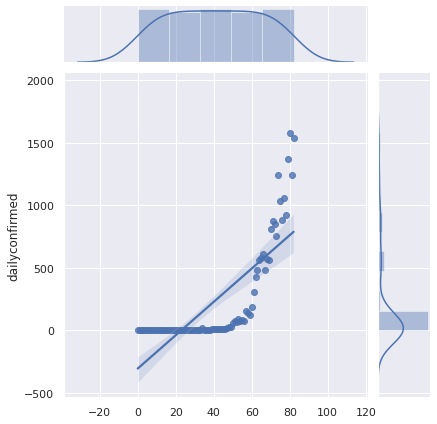

In [11]:
sns.jointplot(x=caseTimeSeries.index,y='dailyconfirmed',data=caseTimeSeries,kind='reg')

In [0]:
stateapi = 'https://api.covid19india.org/states_daily.json'
stateData = requests.get(stateapi).json()

In [0]:
stateDf = pd.DataFrame(stateData['states_daily'])

In [14]:
stateDf.head()

,an,ap,ar,as,br,ch,ct,date,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0


In [0]:
# stateDfConfirmed = stateDf[['ap','date','status']]
stateDfConfirmed = stateDf[stateDf['status'] == 'Confirmed'].fillna(0).replace('',0)
stateDfRecovered = stateDf[stateDf['status'] == 'Recovered'].fillna(0).replace('',0)
stateDfDeceased = stateDf[stateDf['status'] =='Deceased'].fillna(0).replace('',0)

In [16]:
stateDf.columns

Index(['an', 'ap', 'ar', 'as', 'br', 'ch', 'ct', 'date', 'dd', 'dl', 'dn',
       'ga', 'gj', 'hp', 'hr', 'jh', 'jk', 'ka', 'kl', 'la', 'ld', 'mh', 'ml',
       'mn', 'mp', 'mz', 'nl', 'or', 'pb', 'py', 'rj', 'sk', 'status', 'tg',
       'tn', 'tr', 'tt', 'up', 'ut', 'wb'],
      dtype='object')

In [0]:
stateTotalConfirmed =[] 
stateTotalDeceased =[]
stateTotalRecovered =[]
listStates = []
for col in stateDf:
    if col not in ['date','status']:
        listStates.append(col)
#         print (col)
        stateTotalConfirmed.append(np.sum(stateDfConfirmed[col].apply(lambda x: int(x))))
        stateTotalDeceased.append(np.sum(stateDfDeceased[col].apply(lambda x: int(x))))
        stateTotalRecovered.append(np.sum(stateDfRecovered[col].apply(lambda x:int(x))))

In [0]:
data = {'State':listStates, 'Confirmed':stateTotalConfirmed, 'Deceased':stateTotalDeceased, 'Recovered':stateTotalRecovered}

In [0]:
fullData  = pd.DataFrame(data=data)

In [0]:
fullData['Decease%'] = round((fullData['Deceased']/fullData['Confirmed'])*100,2)
fullData['Recover%'] = round((fullData['Recovered']/fullData['Confirmed'])*100,2)
fullData['Active%'] = round(((fullData['Confirmed'] -(fullData['Recovered']+fullData['Deceased']))/fullData['Confirmed'])*100,2)

In [21]:
fullData[fullData['Confirmed'] > 100].sort_values(by='Active%', ascending=False).head(2)

,State,Confirmed,Deceased,Recovered,Decease%,Recover%,Active%
11,gj,2178,90,139,4.13,6.38,89.49
35,up,1337,21,162,1.57,12.12,86.31


In [22]:
fullData[fullData['Confirmed'] > 100].sort_values(by='Decease%', ascending=False).head(20).reset_index()

,index,State,Confirmed,Deceased,Recovered,Decease%,Recover%,Active%
0,27,pb,251,16,49,6.37,19.52,74.10
1,23,mp,1552,81,148,5.22,9.54,85.24
2,20,mh,5218,250,722,4.79,13.84,81.37
3,11,gj,2178,90,139,4.13,6.38,89.49
4,16,ka,418,17,129,4.07,30.86,65.07
5,37,wb,392,15,73,3.83,18.62,77.55
6,34,tt,20080,645,3976,3.21,19.80,76.99
7,1,ap,757,22,96,2.91,12.68,84.41
8,31,tg,928,23,194,2.48,20.91,76.62
9,8,dl,2156,47,611,2.18,28.34,69.48


In [23]:
fullData[fullData['Confirmed'] > 100].sort_values(by='Recover%', ascending=False).head(20).reset_index()

,index,State,Confirmed,Deceased,Recovered,Decease%,Recover%,Active%
0,17,kl,426,2,307,0.47,72.07,27.46
1,13,hr,255,3,146,1.18,57.25,41.57
2,32,tn,1596,18,635,1.13,39.79,59.09
3,4,br,126,2,42,1.59,33.33,65.08
4,16,ka,418,17,129,4.07,30.86,65.07
5,8,dl,2156,47,611,2.18,28.34,69.48
6,15,jk,380,5,81,1.32,21.32,77.37
7,31,tg,928,23,194,2.48,20.91,76.62
8,34,tt,20080,645,3976,3.21,19.80,76.99
9,27,pb,251,16,49,6.37,19.52,74.10


In [24]:
fullData.sort_values(by='Active%', ascending=False)

,State,Confirmed,Deceased,Recovered,Decease%,Recover%,Active%
24,mz,1,0,0,0.00,0.00,100.00
21,ml,12,1,0,8.33,0.00,91.67
11,gj,2178,90,139,4.13,6.38,89.49
14,jh,46,2,4,4.35,8.70,86.96
35,up,1337,21,162,1.57,12.12,86.31
23,mp,1552,81,148,5.22,9.54,85.24
1,ap,757,22,96,2.91,12.68,84.41
29,rj,1735,26,274,1.50,15.79,82.71
20,mh,5218,250,722,4.79,13.84,81.37
37,wb,392,15,73,3.83,18.62,77.55


In [25]:
fig = go.Figure()
fig.add_trace(go.Bar(x=fullData['State'], y=fullData['Decease%'],marker_color='orange', name='Deceased %'))
fig.add_trace(go.Bar(x=fullData['State'], y=fullData['Recover%'],marker_color='green', name='Recovery %'))
fig.update_layout(barmode='stack', title='Deceased & Recovery %')
fig.show()

In [26]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=stateDfConfirmed['date'], y=stateDfConfirmed['ap'], name='AP Confirmed Cases'))
fig.add_trace(go.Scatter(x=stateDfConfirmed['date'], y=stateDfConfirmed['kl'], name='Kerala Confirmed Cases'))
fig.add_trace(go.Scatter(x=stateDfRecovered['date'], y=stateDfRecovered['ap'], name='AP Recovered Cases'))
fig.add_trace(go.Scatter(x=stateDfConfirmed['date'], y=stateDfConfirmed['tg'], name='TG Confirmed Cases'))
# fig.add_trace(go.Bar(x=stateDfConfirmed['date'], y=stateDfConfirmed['ap'], name='Confirmed Cases AP'))
fig.show()

In [27]:
from geopandas import GeoSeries, GeoDataFrame, read_file
from shapely.geometry import Point
from pandas import Series

ModuleNotFoundError: ignored

In [0]:
geoData = read_file(r'C:\Users\phani\Documents\Learn\learn\geoplots\maps-master\States\Admin2.shp')

In [0]:
geoList = geoData.sort_values(by='ST_NM').ST_NM.unique()

In [0]:
len(listStates)

38

In [0]:
dict ={}
for i,_ in enumerate(listStates):
    try:
        dict[_] = geoList[i]
    except IndexError:
        dict[_] = ""

In [0]:
dict = {'an': 'Andaman & Nicobar Island',
 'ap': 'Andhra Pradesh',
 'ar': 'Arunanchal Pradesh',
 'as': 'Assam',
 'br': 'Bihar',
 'ch': 'Chandigarh',
 'ct': 'Chhattisgarh',
 'dd': 'Dadara & Nagar Havelli',
 'dl': 'NCT of Delhi',
 'dn': 'Daman & Diu',
 'ga': 'Goa',
 'gj': 'Gujarat',
 'hp': 'Himachal Pradesh',
 'hr': 'Haryana',
 'jh': 'Jharkhand',
 'jk': 'Jammu & Kashmir',
 'ka': 'Karnataka',
 'kl': 'Kerala',
 'la': '',
 'ld': 'Lakshadweep',
 'mh': 'Maharashtra',
 'ml': 'Meghalaya',
 'mn': 'Manipur',
 'mp': 'Madhya Pradesh',
 'mz': 'Mizoram',
 'nl': 'Nagaland',
 'or': 'Odisha',
 'pb': 'Puducherry',
 'py': 'Punjab',
 'rj': 'Rajasthan',
 'sk': 'Sikkim',
 'tg': 'Telangana',
 'tn': 'Tamil Nadu',
 'tr': 'Tripura',
 'tt': '',
 'up': 'Uttar Pradesh',
 'ut': 'Uttarakhand',
 'wb': 'West Bengal'}

In [0]:
fullData['ST_NM'] = fullData['State'].map(dict)

In [0]:
geoFullData  = geoData.merge(fullData[['Decease%','ST_NM','Recover%','Active%']], on='ST_NM', how='outer')

In [0]:
geoFullData = geoFullData.dropna(subset=['geometry'])

In [0]:
geoFullData['coords'] = geoFullData['geometry'].apply(lambda x: x.representative_point().coords[:])
geoFullData['coords'] = [coords[0] for coords in geoFullData['coords']]

C:\Users\phani\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning:

invalid value encountered in less



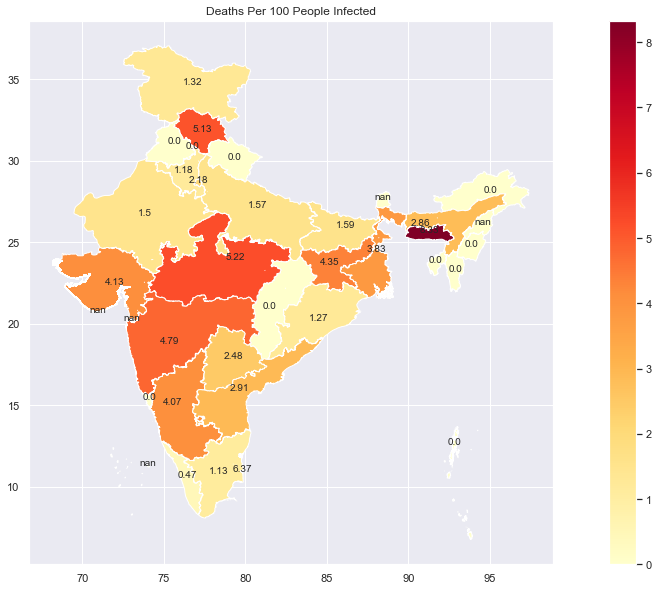

In [0]:
geoFullData.plot(figsize=(20,10), column='Decease%', legend=True,cmap='YlOrRd');

for idx, row in geoFullData.iterrows():
    plt.annotate(s=row['Decease%'],xy=row['coords'], horizontalalignment='center')
    
plt.title('Deaths Per 100 People Infected');

C:\Users\phani\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning:

invalid value encountered in less



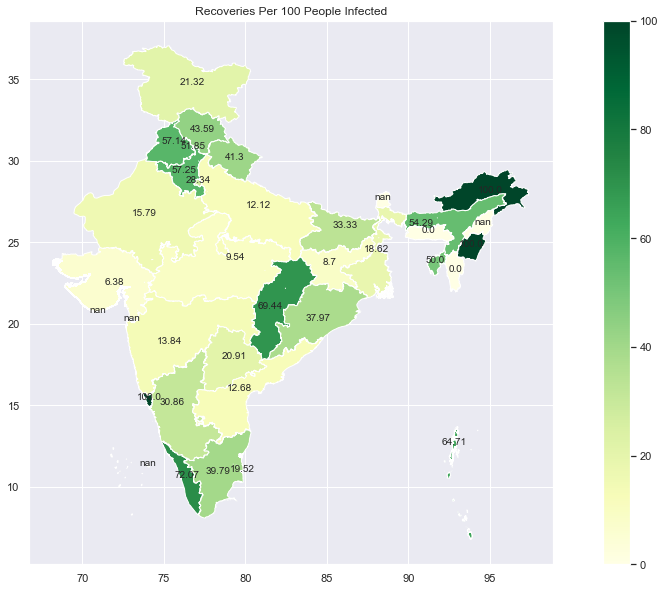

In [0]:
geoFullData.plot(figsize=(18,10), column='Recover%', legend=True,cmap='YlGn');
for idx, row in geoFullData.iterrows():
    plt.annotate(s=row['Recover%'],xy=row['coords'], horizontalalignment='center')
 
plt.title('Recoveries Per 100 People Infected');

C:\Users\phani\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning:

invalid value encountered in less



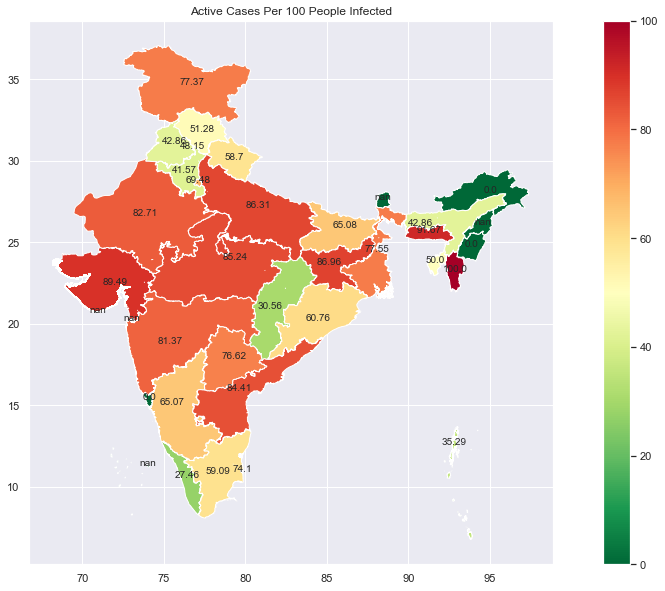

In [0]:
geoFullData.plot(figsize=(18,10), column='Active%', legend=True,cmap='RdYlGn_r');
for idx, row in geoFullData.iterrows():
    plt.annotate(s=row['Active%'],xy=row['coords'], horizontalalignment='center')
 
plt.title('Active Cases Per 100 People Infected');

In [0]:
geoFullData[['ST_NM', 'Decease%', 'Recover%', 'Active%']].sort_values(by='Active%', ascending=False)

,ST_NM,Decease%,Recover%,Active%
21,Mizoram,0.00,0.00,100.00
20,Meghalaya,8.33,0.00,91.67
9,Gujarat,4.13,6.38,89.49
13,Jharkhand,4.35,8.70,86.96
31,Uttar Pradesh,1.57,12.12,86.31
17,Madhya Pradesh,5.22,9.54,85.24
35,Andhra Pradesh,2.91,12.68,84.41
26,Rajasthan,1.50,15.79,82.71
18,Maharashtra,4.79,13.84,81.37
33,West Bengal,3.83,18.62,77.55


# Basic Time Series

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,8
import statsmodels.api as sm
import matplotlib
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [0]:
y = stateDfRecovered['ap'].apply(lambda x: int(x))
y.index = pd.to_datetime(stateDfRecovered['date'])

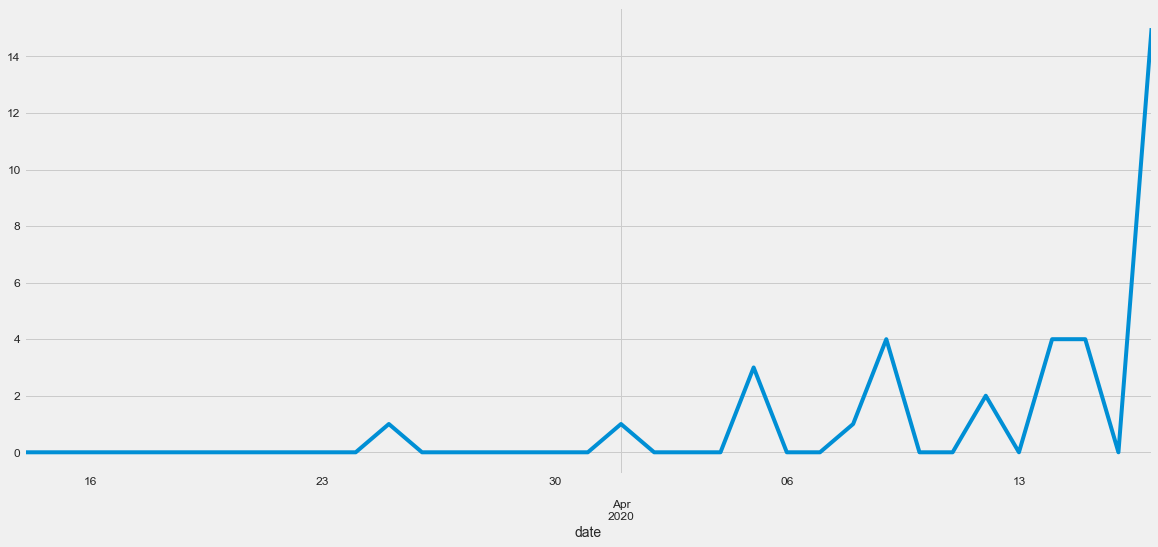

In [0]:
y.plot()

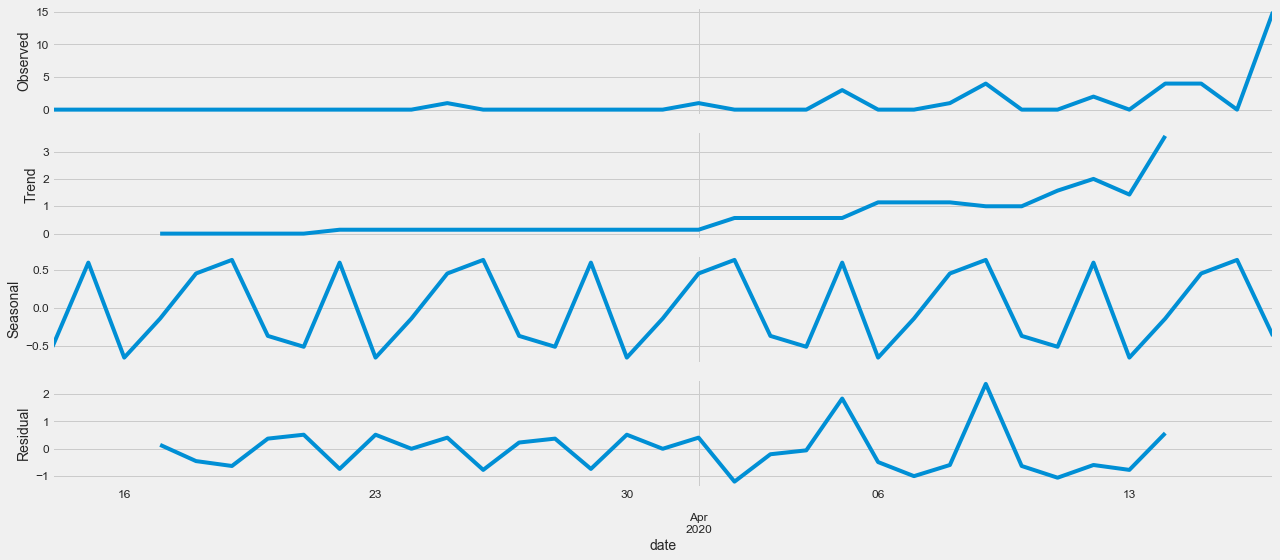

In [0]:

#ARIMA
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [0]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3196      0.396     -0.807      0.420      -1.096       0.457
ma.L1         -1.0000   6680.302     -0.000      1.000   -1.31e+04    1.31e+04
ar.S.L12       2.9177      1.298      2.247      0.025       0.373       5.463
sigma2         5.8800   3.93e+04      0.000      1.000    -7.7e+04     7.7e+04


C:\Users\phani\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



ValueError: operands could not be broadcast together with shapes (9,) (7,) (9,) 

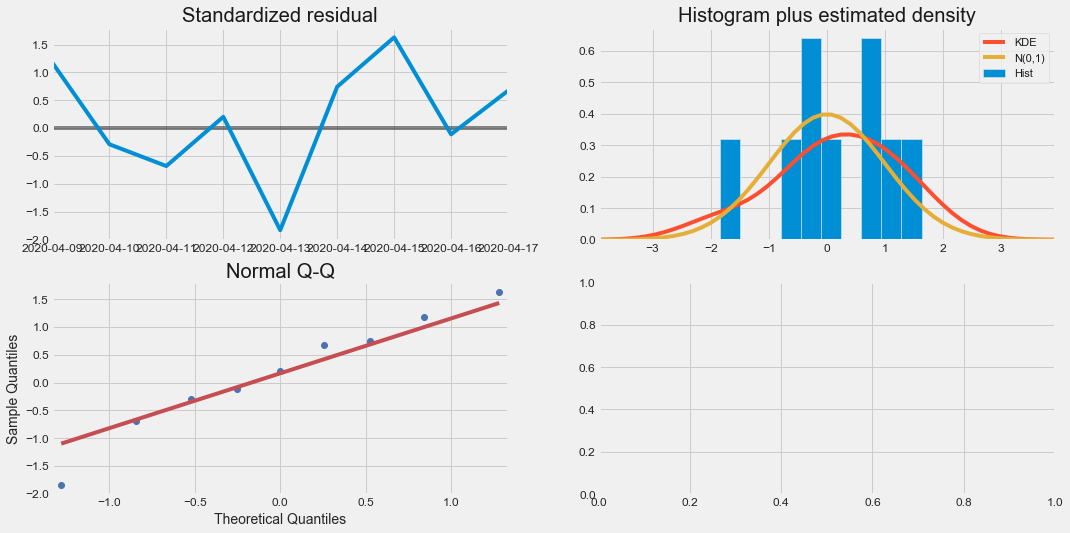

In [0]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [0]:
y_log = np.log(y)

C:\Users\phani\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning:

divide by zero encountered in log



In [0]:
y_roll = y.rolling(4).mean()

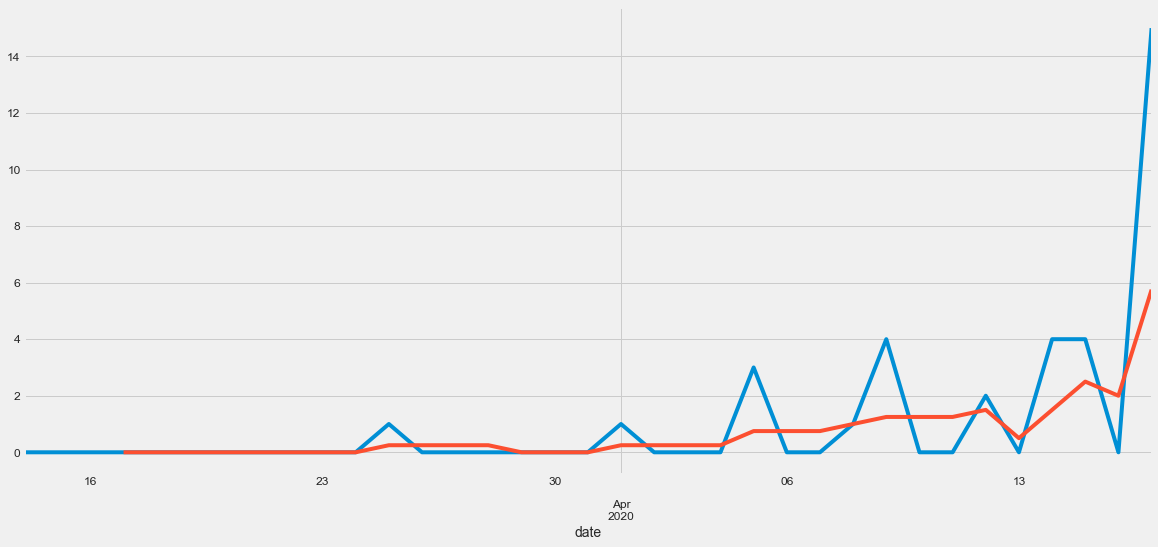

In [0]:
y.plot()
y_roll.plot()